This is a notebook for the Week 3 of the Developer Challenge: https://blogs.sap.com/2023/03/08/sap-community-developer-challenge-eda-with-sap-hana-and-python/

Some code might be incomplete or incorrect. It is your task to fix it and execute the whole notebook receiving correct results.

Submit the link to your solution: https://groups.community.sap.com/t5/application-development/submissions-for-quot-eda-with-sap-hana-quot-developer-challenge/m-p/225900/highlight/true#M1181

## Initialize the notebook

Import required packages

In [1]:
from hana_ml import dataframe as hdf
import pandas as pd

Connect to SAP HANA database instance with a database user, same as during Week 2!

In [5]:
myconn=hdf.ConnectionContext(userkey='DevChallenger')
print("SAP HANA DB version: ", myconn.hana_version())

SAP HANA DB version:  4.00.000.00.1678185420 (fa/CE2022.42)


In [6]:
print(myconn.sql("SELECT NOW() FROM DUMMY").collect().CURRENT_TIMESTAMP[0])

2023-03-23 10:14:55.321000


## Check tables from Week 2 are available for this week's exercises

You should see these 3 tables listed: `BIKES`, `MONTHS`, `SEASONS`. If not, then please complete [the Week 2](https://github.com/SAP-samples/sap-community-developer-challenge-eda-hana/blob/main/notebooks/challenges/week2.ipynb) first.

In [7]:
myconn.get_tables()

,TABLE_NAME
0,BIKES
1,MONTHS
2,SEASONS


Previous week you created HANA DataFrame `bikes_hdf` at the moment of loading a CSV file. 

Now the table with data should already exist in your SAP HANA database, so you use [the `table()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.ConnectionContext.table) this time to create a HANA DataFrame from an existing database table. 

In [11]:
bikes_hdf=myconn.table('BIKES')

In [12]:
bikes_hdf.select_statement

'SELECT * FROM "BIKES"'

## 1. Understand the dataset

Before you understand the data, you need to understand the dataset: what kind of data is stores and its size.

In [13]:
print(f"DataFrame returns {bikes_hdf.count()} record(s)")

DataFrame returns 731 record(s)


But if you are familiar with Pandas dataframes, then typically you want to understand both: numbers of rows and columns in a dataframe. With HANA DataFrame you use [an attribute `shape`](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.shape) for the same.

In [15]:
bikes_hdf.shape

[731, 12]

So, there are 12 columns. [The property `columns`](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.columns) returns their names.

In [16]:
bikes_hdf.columns

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'days_since_2011']

To get SQL types of the columns use [the method `dtypes()`](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.dtypes)...

In [17]:
bikes_hdf.dtypes()

[('season', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('yr', 'INT', 10, 10, 10, 0),
 ('mnth', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('holiday', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('weekday', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('workingday', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('weathersit', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('temp', 'DOUBLE', 15, 15, 15, 0),
 ('hum', 'DOUBLE', 15, 15, 15, 0),
 ('windspeed', 'DOUBLE', 15, 15, 15, 0),
 ('cnt', 'INT', 10, 10, 10, 0),
 ('days_since_2011', 'INT', 10, 10, 10, 0)]

...for example to return a list of columns, which SQL data type is [`NVARCHAR`](https://help.sap.com/docs/HANA_CLOUD_DATABASE/c1d3f60099654ecfb3fe36ac93c121bb/a33f7884b0c14c00b1a76ecd8af5feca.html?locale=en-US&version=2022_4_QRC).

In [19]:
[col[0] for col in bikes_hdf.dtypes() if col[1]=='NVARCHAR']

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In the next step you usally want to look at a few records of the data. At the end of the notebook from Week 2 you used [Pandas method `head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) to return ten first records from the Pandas DataFrame...

In [20]:
bikes_hdf.collect().head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
5,WINTER,2011,JAN,NO HOLIDAY,THU,WORKING DAY,GOOD,1.604356,51.8261,6.000868,1606,5
6,WINTER,2011,JAN,NO HOLIDAY,FRI,WORKING DAY,MISTY,1.236534,49.8696,11.304642,1510,6
7,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,-0.245000,53.5833,17.875868,959,7
8,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,-1.498349,43.4167,24.250650,822,8
9,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,-0.910849,48.2917,14.958889,1321,9


...but this method was applied after `collect()`, when **all** 731 records from HANA table where read into a Python client. With a few hundreds of records it was still Ok, but it would be expensive with tables containing hundreds of thousands of records.

When working with the data stored in a database you should push processing down to the database and have only results returned to the client.

HANA DataFrame has [similar `head()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.head)...

In [21]:
bikes_hdf.head(10).collect()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
5,WINTER,2011,JAN,NO HOLIDAY,THU,WORKING DAY,GOOD,1.604356,51.8261,6.000868,1606,5
6,WINTER,2011,JAN,NO HOLIDAY,FRI,WORKING DAY,MISTY,1.236534,49.8696,11.304642,1510,6
7,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,-0.245000,53.5833,17.875868,959,7
8,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,-1.498349,43.4167,24.250650,822,8
9,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,-0.910849,48.2917,14.958889,1321,9


...but this time these 10 records are selected from a table already in the database using `TOP X` syntax of SQL `SELECT` statement; and only these 10 records are returned to the client.

In [24]:
bikes_hdf.head(10).select_statement

'SELECT TOP 10 * FROM (SELECT * FROM "BIKES") dt'

Similarly to Pandas a HANA DataFrame provides [a `tail()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.tail), but allows you to provide a reference column `ref_col` accordingly to which a dataset should be sorted before the last X (in this example **5**) records are selected in the database and returned to a client.

In [26]:
bikes_hdf.tail(5, ref_col='days_since_2011').collect()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2012,DEC,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114,726
1,WINTER,2012,DEC,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095,727
2,WINTER,2012,DEC,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341,728
3,WINTER,2012,DEC,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796,729
4,WINTER,2012,DEC,NO HOLIDAY,MON,WORKING DAY,MISTY,2.144151,57.7500,10.374682,2729,730


As `SELECT` statement in SQL does not provide equivalent to `TOP` syntax to return bottom records, the SELECT statement generated for you by `hana-ml` package is more complex than the one for the `head()`.

In [27]:
bikes_hdf.tail(5, ref_col='days_since_2011').select_statement

'SELECT "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed", "cnt", "days_since_2011" FROM (SELECT  ROW_NUMBER() OVER(ORDER BY "days_since_2011" ASC) IDXA6D2569E_C965_11ED_9BFD_FFEBBEEE9337 , * FROM (SELECT * FROM "BIKES")) WHERE IDXA6D2569E_C965_11ED_9BFD_FFEBBEEE9337 <= 731 AND IDXA6D2569E_C965_11ED_9BFD_FFEBBEEE9337 > 726'

Typically for Machine Learning scenarios you want to analyze, if a dataset contains `NULL` values, which might decrease the quality of data analysis or ML models created. Use [a method `hasna()`](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.hasna) to check NULL values in a HANA DataFrame...

In [28]:
bikes_hdf.hasna()

False

...or in particular DataFrame's columns:

In [31]:
for col in bikes_hdf.columns:
    print(f"NULLs in {col}: {bikes_hdf.hasna(col)} ")

NULLs in season: False 
NULLs in yr: False 
NULLs in mnth: False 
NULLs in holiday: False 
NULLs in weekday: False 
NULLs in workingday: False 
NULLs in weathersit: False 
NULLs in temp: False 
NULLs in hum: False 
NULLs in windspeed: False 
NULLs in cnt: False 
NULLs in days_since_2011: False 


Generate descriptive statistics in database. [A method `describe()`](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.describe) returns a DataFrame that contains various statistics for the requested column(s) or the complete DataFrame.

In [39]:
bikes_hdf.describe().collect()

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,yr,731,2,0,2011.500684,0.500341,2011.000000,2012.000000,2012.000000,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000,2012.000000
1,temp,731,499,0,15.283085,8.603397,-5.220871,32.498349,15.421651,7.842924,7.823349,15.421651,15.421651,22.804576,22.824151
2,hum,731,595,0,62.789406,14.242910,0.000000,97.250000,62.666700,52.000000,52.000000,62.666700,62.666700,73.020850,73.041700
3,windspeed,731,650,0,12.762576,5.192357,1.500244,34.000021,12.125325,9.041650,9.041650,12.125325,12.125325,15.625371,15.625807
4,cnt,731,696,0,4504.348837,1937.211451,22.000000,8714.000000,4548.000000,3152.000000,3141.000000,4548.000000,4548.000000,5956.000000,5976.000000
5,days_since_2011,731,731,0,365.000000,211.165811,0.000000,730.000000,365.000000,182.500000,182.000000,365.000000,365.000000,547.500000,548.000000
6,season,731,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,mnth,731,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,holiday,731,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,weekday,731,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A method `describe()` returns a HANA DataFrame, that's why you had to use `collect()` in the previous cell.

You can see an SQL statement of the HANA Frame generated by the `describe()`.

In [45]:
# combining the cool stuff to get rid of NaN - too early ;-)
num_cols = [col[0] for col in bikes_hdf.dtypes() if col[1]!='NVARCHAR']
#display(num_cols)

#for col in num_cols:
#    display(bikes_hdf.describe(col).collect())

display(bikes_hdf.describe(num_cols).collect())
#bikes_hdf.describe().select_statement

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,yr,731,2,0,2011.500684,0.500341,2011.000000,2012.000000,2012.000000,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000,2012.000000
1,temp,731,499,0,15.283085,8.603397,-5.220871,32.498349,15.421651,7.842924,7.823349,15.421651,15.421651,22.804576,22.824151
2,hum,731,595,0,62.789406,14.242910,0.000000,97.250000,62.666700,52.000000,52.000000,62.666700,62.666700,73.020850,73.041700
3,windspeed,731,650,0,12.762576,5.192357,1.500244,34.000021,12.125325,9.041650,9.041650,12.125325,12.125325,15.625371,15.625807
4,cnt,731,696,0,4504.348837,1937.211451,22.000000,8714.000000,4548.000000,3152.000000,3141.000000,4548.000000,4548.000000,5956.000000,5976.000000
5,days_since_2011,731,731,0,365.000000,211.165811,0.000000,730.000000,365.000000,182.500000,182.000000,365.000000,365.000000,547.500000,548.000000


In [44]:
bikes_hdf.describe().select_statement

'SELECT * FROM (SELECT "SimpleStats".*, "Percentiles"."25_percent_cont", "Percentiles"."25_percent_disc", "Percentiles"."50_percent_cont", "Percentiles"."50_percent_disc", "Percentiles"."75_percent_cont", "Percentiles"."75_percent_disc" FROM (select \'yr\' as "column", COUNT("yr") as "count", COUNT(DISTINCT "yr") as "unique", SUM(CASE WHEN "yr" is NULL THEN 1 ELSE 0 END) as "nulls", AVG(TO_DOUBLE("yr")) as "mean", STDDEV("yr") as "std", MIN("yr") as "min", MAX("yr") as "max", MEDIAN("yr") as "median" FROM (SELECT * FROM "BIKES") AS "DT_6" UNION ALL select \'temp\' as "column", COUNT("temp") as "count", COUNT(DISTINCT "temp") as "unique", SUM(CASE WHEN "temp" is NULL THEN 1 ELSE 0 END) as "nulls", AVG(TO_DOUBLE("temp")) as "mean", STDDEV("temp") as "std", MIN("temp") as "min", MAX("temp") as "max", MEDIAN("temp") as "median" FROM (SELECT * FROM "BIKES") AS "DT_6" UNION ALL select \'hum\' as "column", COUNT("hum") as "count", COUNT(DISTINCT "hum") as "unique", SUM(CASE WHEN "hum" is NULL

LEt's get back to the results returned by `bikes_hdf.describe().collect()` above.

As tested before with `hasna()` method, you can confirm there are no NULL values in any column, because `nulls` column in the describe's result contains only `0`. 

### Closer look at properties of columns in a dataframe

Check statistics only for columns storing strings (SQL data type `NVARCHAR`).

In [46]:
bikes_hdf.describe([col[0] for col in bikes_hdf.dtypes() if col[1]=='NVARCHAR']).collect().dropna(axis=1,how='all')

,column,count,unique,nulls
0,season,731,4,0
1,mnth,731,12,0
2,holiday,731,2,0
3,weekday,731,7,0
4,workingday,731,2,0
5,weathersit,731,3,0


To increase a readability of such long lines of chained methods it is good to follow the recommendation:
> Long lines can be broken over multiple lines by wrapping expressions in parentheses.

from [PEP 8 "Style Guide for Python Code"](https://peps.python.org/pep-0008/#maximum-line-length).

In [49]:
(bikes_hdf
 .describe([col[0] for col in bikes_hdf.dtypes() if col[1]=='NVARCHAR'])
 .collect()
 .dropna(axis=1,how='all') # uncomment this line to see the difference
 .set_index('column')
)

,count,unique,nulls
column,,,
season,731,4,0
mnth,731,12,0
holiday,731,2,0
weekday,731,7,0
workingday,731,2,0
weathersit,731,3,0


There are 4 unique values in the `season` column. Check them using [a `distinct()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.distinct), and -- as expected -- you should get four season names.

In [50]:
bikes_hdf.distinct(cols='season').collect()

,season
0,SUMMER
1,FALL
2,SPRING
3,WINTER


As cardinality of each of those columns storing stings is low (12 unique values at the most). Let's list all values for all of those columns.

In [51]:
for column in [col[0] for col in bikes_hdf.dtypes() if col[1]=='NVARCHAR']:
    print(f"{column}: {bikes_hdf.distinct(column).collect().iloc[:,0].tolist()}")

season: ['SUMMER', 'FALL', 'SPRING', 'WINTER']
mnth: ['APR', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT', 'SEP']
holiday: ['HOLIDAY', 'NO HOLIDAY']
weekday: ['FRI', 'TUE', 'SUN', 'THU', 'WED', 'MON', 'SAT']
workingday: ['NO WORKING DAY', 'WORKING DAY']
weathersit: ['MISTY', 'GOOD', 'RAIN/SNOW/STORM']


For example, there are only 3 values in `weathersit` describig a weather situation.

Check how often each weather situation occurs in the dataframe using [a `value_counts()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.value_counts). Note that it can only accept a list `[]` of column, even if the list contains only one column.

In [52]:
bikes_hdf.value_counts(['weathersit']).collect()

,VALUES,NUM_weathersit
0,MISTY,247
1,GOOD,463
2,RAIN/SNOW/STORM,21


Now check basic characteristics of numeric values in columns.

In [53]:
(bikes_hdf
 .describe([col[0] for col in bikes_hdf.dtypes() if col[1]!='NVARCHAR'])
 .collect()
 .iloc[:,:9]
 .set_index('column')
)
# nice ;-) - perhaps we should create the pandas statement in comparison to illustrate the efficiency?

,count,unique,nulls,mean,std,min,max,median
column,,,,,,,,
yr,731,2,0,2011.500684,0.500341,2011.000000,2012.000000,2012.000000
temp,731,499,0,15.283085,8.603397,-5.220871,32.498349,15.421651
hum,731,595,0,62.789406,14.242910,0.000000,97.250000,62.666700
windspeed,731,650,0,12.762576,5.192357,1.500244,34.000021,12.125325
cnt,731,696,0,4504.348837,1937.211451,22.000000,8714.000000,4548.000000
days_since_2011,731,731,0,365.000000,211.165811,0.000000,730.000000,365.000000


What you can read from these values?

1. Year column `yr` contains only 2 different values. Min is `2011` and max is `2012`, so the dataframe contains data for two years: 2011 and 2012.
1. A column `days_since_2011` contains 731 unique values in 731 records, so each record represents data for one day.
1. Min value for that column is `0` and the max is `730`, so we have values for 731 consequtive days, starting from 2011-01-01.
1. A column `cnt` stores a number of bike rentals per day.
1. A temperature `temp` range between -5.2 and 32.5 should be in degrees Celcius.
1. A `hum` is a humidity percentage, although min value of 0% must be a mistake in data.| 

In [57]:
bikes_hdf.value_counts(['yr']).collect()

,VALUES,NUM_yr
0,2011,365
1,2012,366


For continues, and not discrete, values (like `hum`) binning is more appropriate in the process of data exploration. Use [a `bin` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.bin) for that.

In [59]:
(bikes_hdf
 .select('hum').sort('hum')
 .bin('hum', strategy='uniform_number', bins=10)
 .collect()
)

,hum,BIN_NUMBER
0,0.0000,1
1,18.7917,2
2,25.4167,3
3,27.5833,3
4,29.0000,3
...,...,...
726,94.8261,10
727,94.9583,10
728,96.2500,10
729,97.0417,10


Indeed `0.0000` humidity percentage should be an outlier, for example wrong data recorded...

<Axes: ylabel='VALUES'>

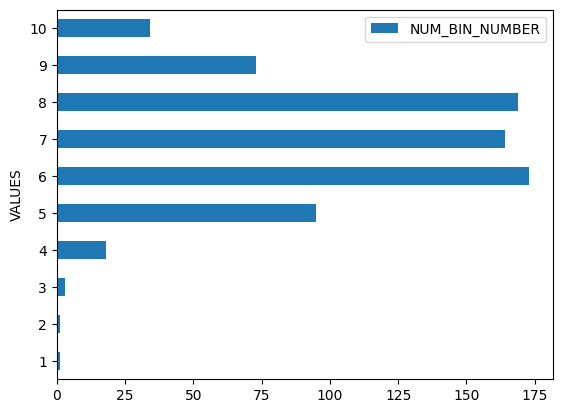

In [61]:
(bikes_hdf
 .select('hum').sort('hum')
 .bin('hum', strategy='uniform_number', bins=10)
 .value_counts(subset=['BIN_NUMBER'])
 .collect().set_index('VALUES')
).plot(kind='barh') # could not resist ;-)

...and it is the only value in the 1st bin. Most of the values are in bins 6, 7 and 8 (so between 50% and 80% humidity).

It would be the best to support such analysis visually, but **this is the topic for next Week 4**.

## 2. Understand the data

Let's look at how HANA DataFrames support filtering (selecting rows), projection (selecting columns), and joining (combining datasets) -- basic [relational operations](https://en.wikipedia.org/wiki/Relational_model#Relational_operations) on tabular data stored in SAP HANA tables.

### Filtering

Use [a `filter()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.filter) to return only rows that match the given condition.

A `condition` parameter is included into the generated SQL SELECT statement, so you need to pay attention to names of [identifiers](https://help.sap.com/docs/HANA_CLOUD_DATABASE/c1d3f60099654ecfb3fe36ac93c121bb/209f5020751910148fd8fe88aa4d79d9.html#identifiers) (here: column names). In SAP HANA database:
> "[*Identifiers without double-quotes in SQL syntax are converted to upper case when processed by the server.*](https://help.sap.com/docs/HANA_CLOUD_DATABASE/c1d3f60099654ecfb3fe36ac93c121bb/209f5020751910148fd8fe88aa4d79d9.html#identifiers-and-case-sensitivity)"

In [62]:
bikes_hdf.filter(condition='"yr"=2011').count()

365

You need to be careful with quotation marks used to delimit Python strings and used for SAP HANA SQL within Python strings.

In Python:
> "[*Both types of literals can be enclosed in matching single quotes (') or double quotes ("). ... The backslash (\) character is used to escape characters that otherwise have a special meaning, such as newline, backslash itself, or the quote character.*](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals)"

In SAP HANA database:
> "[*Single quotation marks are used to delimit string literals. ... Double quotation marks are used to delimit identifiers. ...*](https://help.sap.com/docs/HANA_CLOUD_DATABASE/c1d3f60099654ecfb3fe36ac93c121bb/209f5020751910148fd8fe88aa4d79d9.html#quotation-marks)"

In [65]:
bikes_hdf.filter('"yr"=2011 AND "holiday"=\'HOLIDAY\'').collect()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,HOLIDAY,MON,NO WORKING DAY,MISTY,0.264151,53.7500,12.999139,1000,16
1,WINTER,2011,FEB,HOLIDAY,MON,NO WORKING DAY,MISTY,6.256651,60.5000,20.625682,1107,51
2,SPRING,2011,APR,HOLIDAY,FRI,NO WORKING DAY,GOOD,12.993349,67.1250,15.167125,3126,104
3,SPRING,2011,MAY,HOLIDAY,MON,NO WORKING DAY,GOOD,26.466651,68.5000,8.792075,4098,149
4,SUMMER,2011,JUL,HOLIDAY,MON,NO WORKING DAY,MISTY,26.153349,63.7917,5.459106,6043,184
5,SUMMER,2011,SEP,HOLIDAY,MON,NO WORKING DAY,MISTY,23.646651,79.0417,14.250632,3351,247
6,FALL,2011,OCT,HOLIDAY,MON,NO WORKING DAY,GOOD,18.829151,73.3750,2.834381,5117,282
7,FALL,2011,NOV,HOLIDAY,FRI,NO WORKING DAY,GOOD,7.235849,44.6250,21.083225,3368,314
8,FALL,2011,NOV,HOLIDAY,THU,NO WORKING DAY,GOOD,9.546651,54.9167,11.209368,1495,327
9,WINTER,2011,DEC,HOLIDAY,MON,NO WORKING DAY,GOOD,7.121733,50.6957,16.044155,1317,359


### Projection

Use [a `select()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.select) to return only columns you want to have in the result HANA DataFrame.

In [73]:
(bikes_hdf
 .filter('"yr"=2011 AND "holiday"=\'HOLIDAY\'')
 .select('weekday', 'days_since_2011')
 .collect()
)

,weekday,days_since_2011
0,MON,16
1,MON,51
2,FRI,104
3,MON,149
4,MON,184
5,MON,247
6,MON,282
7,FRI,314
8,THU,327
9,MON,359


A `select()` method can be used to derive new columns from existing when provided as a tuple `(<SQL expression>, <alias>)`.

In the example below a new column `calday` is calculated using [the SAP HANA SQL `ADD_DAYS` function](https://help.sap.com/docs/HANA_CLOUD_DATABASE/c1d3f60099654ecfb3fe36ac93c121bb/20da5fa8751910148969da2572b25ed8.html?version=2022_4_QRC&locale=en-US) to add number from the `"days_since_2011"` column to the date `2011-01-01`.

In [74]:
(bikes_hdf
 .filter('"yr"=2011 AND "holiday"=\'HOLIDAY\'')
 .select('weekday', ('ADD_DAYS(\'2011-01-01\',"days_since_2011")', 'calday'))
 .collect()
)

,weekday,calday
0,MON,2011-01-17
1,MON,2011-02-21
2,FRI,2011-04-15
3,MON,2011-05-30
4,MON,2011-07-04
5,MON,2011-09-05
6,MON,2011-10-10
7,FRI,2011-11-11
8,THU,2011-11-24
9,MON,2011-12-26


Based on the holiday dates returned you can deduct they are [US Federal Holidays 2011](https://www.calendarpedia.com/holidays/federal-holidays-2011.html).

Note that if you create a new HANA DataFrame `bikebydays_hdf` that has all columns (`'*'`) from the original dataframe `bikes_hdf` plus a derived column `calday`, no database object is created in SAP HANA.

In [80]:
bikebydays_hdf=bikes_hdf.select('*', ('add_days(\'2011-01-01\',"days_since_2011")', 'calday'))
#bikebydays_hdf.collect()

This HANA DataFrame exists only in the scope of a Python session and stores an SQL SELECT statement used to query data from its connection to an SAP HANA database.

In [81]:
bikebydays_hdf.select_statement

'SELECT "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed", "cnt", "days_since_2011", add_days(\'2011-01-01\',"days_since_2011") AS "calday" FROM (SELECT * FROM "BIKES") AS "DT_6"'

Use this HANA DataFrame `bikebydays_hdf` to query holidays in 2012.

In [83]:
(bikebydays_hdf
 .filter('"yr"=2012 AND "holiday"=\'HOLIDAY\'')
 .select('weekday', 'calday')
 .collect()
)

,weekday,calday
0,MON,2012-01-02
1,MON,2012-01-16
2,MON,2012-02-20
3,MON,2012-04-16
4,MON,2012-05-28
5,WED,2012-07-04
6,MON,2012-09-03
7,MON,2012-10-08
8,MON,2012-11-12
9,THU,2012-11-22


Find days with the smallest numbers of bike rentals.

In [86]:
bikebydays_hdf.deselect('days_since_2011').sort(cols='cnt', desc=False).head(5).collect()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,calday
0,FALL,2012,OCT,NO HOLIDAY,MON,WORKING DAY,RAIN/SNOW/STORM,12.680000,88.0000,23.999400,22,2012-10-29
1,WINTER,2011,JAN,NO HOLIDAY,THU,WORKING DAY,GOOD,1.165000,68.7500,7.627079,431,2011-01-27
2,WINTER,2012,DEC,NO HOLIDAY,WED,WORKING DAY,RAIN/SNOW/STORM,3.436651,82.3333,21.208582,441,2012-12-26
3,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,RAIN/SNOW/STORM,2.222500,86.2500,19.687950,506,2011-01-26
4,WINTER,2011,MAR,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.696534,94.8261,23.000229,605,2011-03-06


What is the smallest count of bikes rented during one day?

`Edit this markdown cell and type your answer:`

On Monday the 29.10.2012 only 22 bike rentals occurred. Looks like an outlier without obvious reason even though it was quite windy-

### Joining

Let's check summer months of 2012.

Please note tripple single quotes used by Python string. You do not need to use escape character `\` in front of single qoutes of HANA's string of `'SUMMER'` in such case.

In [87]:
bikes_hdf.filter('''
"season"='SUMMER' AND "yr"=2012
''').distinct('mnth').collect()

,mnth
0,AUG
1,JUL
2,JUN
3,SEP


In [109]:
(bikebydays_hdf.filter('''
"season"='SUMMER' AND "yr"=2012
''')
 .agg(
     [('min', "calday", 'MIN'),
      ('max', "calday", 'MAX')], 
     group_by=["mnth"]
 )
 .collect()
)

,mnth,MIN,MAX
0,AUG,2012-08-01,2012-08-31
1,JUL,2012-07-01,2012-07-31
2,JUN,2012-06-21,2012-06-30
3,SEP,2012-09-01,2012-09-22


Month are not ordered as you might used to see elsewhere. Let's use another table `MONTHS`, which you created during Week 2, to order these months accordingly to their `ID` number.

In [101]:
myconn.table('MONTHS').collect()

,ID,DESC
0,1,JAN
1,2,FEB
2,3,MAR
3,4,APR
4,5,MAY
5,6,JUN
6,7,JUL
7,8,AUG
8,9,SEP
9,10,OCT


In this last step this week, let's [join](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.DataFrame.join) last two HANA DataFrames to order month by their `ID` from `MONTHS` table.

In [103]:
(bikebydays_hdf.filter('''
"season"='SUMMER' AND "yr"=2012
''')
 .agg(
     [('min', 'calday', 'MIN'),
      ('max', 'calday', 'MAX')], 
     group_by=['mnth']
 )
 .join(other=myconn.table('MONTHS'), condition='"mnth"="DESC"', 
       select=['ID', ('DESC', 'MONTH'), 'MIN', 'MAX'])
 .sort('ID')
 .collect()
 .set_index('ID')
)

,MONTH,MIN,MAX
ID,,,
6,JUN,2012-06-21,2012-06-30
7,JUL,2012-07-01,2012-07-31
8,AUG,2012-08-01,2012-08-31
9,SEP,2012-09-01,2012-09-22


So, in this dataset seasons are [astronomical seasons](https://en.wikipedia.org/wiki/Season#Astronomical), where summer of 2012 started on June 21st and ended on Sep 22.

Well done! You've explored a lot of insights about data in the bikes rental dataset.

During next Week 4 -- the last week of this challenge -- you will work with `hana-ml` provided visualization of data in SAP HANA database to discover more insights!

### Stay tuned for the Week 4!